In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd 
from itertools import combinations
import matplotlib.pyplot as plt

In [3]:
def file2csv(file_name):
    data = []
    keys = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital',
            'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
            'hr_per_week', 'country', 'income']
    with open(file_name) as f:
        for line in f:
            attributes = line.strip().split(',')
            data_point = {}
            for idx, attribute in enumerate(attributes):
                data_point[keys[idx]] = np.nan if attribute.strip() == '?' else attribute.strip()
            data.append(data_point)

    df = pd.DataFrame(data)
    # write to csv
#     integer_atts = ['age', 'hr_per_week', 'capital_gain', 'capital_loss'] 
#     df[integer_atts] = df[integer_atts].astype(int)
    return df

In [4]:
df = file2csv('adult.train')

In [5]:
df[:20]

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,176189,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,30,Private,161690,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,60,Private,145493,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,42,Private,144995,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,25,United-States,<=50K
4,23,Private,50341,Masters,14,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States,<=50K
5,50,Self-emp-not-inc,68898,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,7688,0,55,United-States,>50K
6,17,Private,148522,11th,7,Never-married,Other-service,Own-child,White,Male,0,1721,15,United-States,<=50K
7,47,Private,363418,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,70,United-States,>50K
8,49,Local-gov,119904,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7688,0,30,United-States,>50K
9,45,Private,178341,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
integer_atts = ['age', 'hr_per_week', 'capital_gain', 'capital_loss'] 
df[integer_atts] = df[integer_atts].astype(int)

In [7]:
df.shape

(4000, 15)

In [8]:
df = df.dropna()

In [9]:
df.shape

(3700, 15)

In [10]:
filtered_df = df.drop(['fnlwgt', 'education_num', 'relationship'], axis=1)

In [11]:
filtered_df[:10]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,<=50K
1,30,Private,Assoc-voc,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K
2,60,Private,Some-college,Divorced,Adm-clerical,White,Female,0,0,40,United-States,<=50K
3,42,Private,Preschool,Never-married,Handlers-cleaners,White,Male,0,0,25,United-States,<=50K
4,23,Private,Masters,Never-married,Sales,White,Female,0,0,20,United-States,<=50K
5,50,Self-emp-not-inc,Masters,Married-civ-spouse,Sales,White,Male,7688,0,55,United-States,>50K
6,17,Private,11th,Never-married,Other-service,White,Male,0,1721,15,United-States,<=50K
7,47,Private,Some-college,Never-married,Sales,White,Male,0,0,70,United-States,>50K
8,49,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,White,Female,7688,0,30,United-States,>50K
9,45,Private,Masters,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,<=50K


In [12]:
filtered_df.shape

(3700, 12)

In [13]:
filtered_df.loc[filtered_df['capital_gain'] > 0,'capital_gain'] = 'yes'  # yes > 0, no = 0
filtered_df.loc[filtered_df['capital_gain'] == 0, 'capital_gain'] = 'no'
filtered_df.loc[filtered_df['capital_loss'] > 0, 'capital_loss'] = 'yes'  # yes > 0, no = 0
filtered_df.loc[filtered_df['capital_loss'] == 0, 'capital_loss'] = 'no'
filtered_df.loc[filtered_df['country'] != 'United-States', 'country'] = 'other'  # United-States, other

In [14]:
filtered_df[:20]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,no,no,40,United-States,<=50K
1,30,Private,Assoc-voc,Never-married,Prof-specialty,White,Female,no,no,40,United-States,<=50K
2,60,Private,Some-college,Divorced,Adm-clerical,White,Female,no,no,40,United-States,<=50K
3,42,Private,Preschool,Never-married,Handlers-cleaners,White,Male,no,no,25,United-States,<=50K
4,23,Private,Masters,Never-married,Sales,White,Female,no,no,20,United-States,<=50K
5,50,Self-emp-not-inc,Masters,Married-civ-spouse,Sales,White,Male,yes,no,55,United-States,>50K
6,17,Private,11th,Never-married,Other-service,White,Male,no,yes,15,United-States,<=50K
7,47,Private,Some-college,Never-married,Sales,White,Male,no,no,70,United-States,>50K
8,49,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,White,Female,yes,no,30,United-States,>50K
9,45,Private,Masters,Married-civ-spouse,Prof-specialty,White,Male,no,no,50,United-States,<=50K


In [15]:
category_age = ['young', 'adult', 'senior', 'old']
filtered_df['age'] = pd.cut(x=filtered_df['age'],
                            bins=[0, 25, 45, 65, 90],
                            labels=category_age)
category_hour = ['part-time', 'full-time', 'over-time']
filtered_df['hr_per_week'] = pd.cut(x=filtered_df['hr_per_week'],
                                    bins=[0, 39, 40, 168],
                                    labels=category_hour)

In [16]:
filtered_df[:20]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,young,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,no,no,full-time,United-States,<=50K
1,adult,Private,Assoc-voc,Never-married,Prof-specialty,White,Female,no,no,full-time,United-States,<=50K
2,senior,Private,Some-college,Divorced,Adm-clerical,White,Female,no,no,full-time,United-States,<=50K
3,adult,Private,Preschool,Never-married,Handlers-cleaners,White,Male,no,no,part-time,United-States,<=50K
4,young,Private,Masters,Never-married,Sales,White,Female,no,no,part-time,United-States,<=50K
5,senior,Self-emp-not-inc,Masters,Married-civ-spouse,Sales,White,Male,yes,no,over-time,United-States,>50K
6,young,Private,11th,Never-married,Other-service,White,Male,no,yes,part-time,United-States,<=50K
7,senior,Private,Some-college,Never-married,Sales,White,Male,no,no,over-time,United-States,>50K
8,senior,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,White,Female,yes,no,part-time,United-States,>50K
9,adult,Private,Masters,Married-civ-spouse,Prof-specialty,White,Male,no,no,over-time,United-States,<=50K


In [17]:
filtered_df['type_employer'] = filtered_df['type_employer'].replace(['Federal-gov',
                                                                     'Local-gov',
                                                                     'State-gov'], 
                                                                    'gov')
filtered_df['type_employer'] = filtered_df['type_employer'].replace(['Without-pay',
                                                                     'Never-worked'],
                                                                    'Not-working')
filtered_df['type_employer'] = filtered_df['type_employer'].replace(['Self-emp-inc',
                                                                     'Self-emp-not-inc'],
                                                                    'Self-employed')

In [18]:
filtered_df[:20]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,young,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,no,no,full-time,United-States,<=50K
1,adult,Private,Assoc-voc,Never-married,Prof-specialty,White,Female,no,no,full-time,United-States,<=50K
2,senior,Private,Some-college,Divorced,Adm-clerical,White,Female,no,no,full-time,United-States,<=50K
3,adult,Private,Preschool,Never-married,Handlers-cleaners,White,Male,no,no,part-time,United-States,<=50K
4,young,Private,Masters,Never-married,Sales,White,Female,no,no,part-time,United-States,<=50K
5,senior,Self-employed,Masters,Married-civ-spouse,Sales,White,Male,yes,no,over-time,United-States,>50K
6,young,Private,11th,Never-married,Other-service,White,Male,no,yes,part-time,United-States,<=50K
7,senior,Private,Some-college,Never-married,Sales,White,Male,no,no,over-time,United-States,>50K
8,senior,gov,Bachelors,Married-civ-spouse,Prof-specialty,White,Female,yes,no,part-time,United-States,>50K
9,adult,Private,Masters,Married-civ-spouse,Prof-specialty,White,Male,no,no,over-time,United-States,<=50K


In [19]:
filtered_df['education'] = filtered_df['education'].replace(['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th',
                                                             '9th',
                                                             '10th',
                                                             '11th',
                                                             '12th'],
                                                            'BeforeHS')
filtered_df['education'] = filtered_df['education'].replace(['Prof-school',
                                                             'Assoc-acdm',
                                                             'Assoc-voc',
                                                             'Some-college'],
                                                           'AfterHS')
filtered_df['education'] = filtered_df['education'].replace(['Masters',
                                                             'Doctorate'],
                                                            'Grd')

In [20]:
filtered_df[:30]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,young,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,no,no,full-time,United-States,<=50K
1,adult,Private,AfterHS,Never-married,Prof-specialty,White,Female,no,no,full-time,United-States,<=50K
2,senior,Private,AfterHS,Divorced,Adm-clerical,White,Female,no,no,full-time,United-States,<=50K
3,adult,Private,BeforeHS,Never-married,Handlers-cleaners,White,Male,no,no,part-time,United-States,<=50K
4,young,Private,Grd,Never-married,Sales,White,Female,no,no,part-time,United-States,<=50K
5,senior,Self-employed,Grd,Married-civ-spouse,Sales,White,Male,yes,no,over-time,United-States,>50K
6,young,Private,BeforeHS,Never-married,Other-service,White,Male,no,yes,part-time,United-States,<=50K
7,senior,Private,AfterHS,Never-married,Sales,White,Male,no,no,over-time,United-States,>50K
8,senior,gov,Bachelors,Married-civ-spouse,Prof-specialty,White,Female,yes,no,part-time,United-States,>50K
9,adult,Private,Grd,Married-civ-spouse,Prof-specialty,White,Male,no,no,over-time,United-States,<=50K


In [21]:
filtered_df['marital'] = filtered_df['marital'].replace(['Married-AF-spouse',
                                                             'Married-civ-spouse'],
                                                            'Married')

filtered_df['marital'] = filtered_df['marital'].replace(['Married-spouse-absent',
                                                         'Separated',
                                                         'Divorced',
                                                         'Widowed'],
                                                        'Not-married')

In [22]:
filtered_df[:30]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,young,Private,HS-grad,Married,Machine-op-inspct,White,Male,no,no,full-time,United-States,<=50K
1,adult,Private,AfterHS,Never-married,Prof-specialty,White,Female,no,no,full-time,United-States,<=50K
2,senior,Private,AfterHS,Not-married,Adm-clerical,White,Female,no,no,full-time,United-States,<=50K
3,adult,Private,BeforeHS,Never-married,Handlers-cleaners,White,Male,no,no,part-time,United-States,<=50K
4,young,Private,Grd,Never-married,Sales,White,Female,no,no,part-time,United-States,<=50K
5,senior,Self-employed,Grd,Married,Sales,White,Male,yes,no,over-time,United-States,>50K
6,young,Private,BeforeHS,Never-married,Other-service,White,Male,no,yes,part-time,United-States,<=50K
7,senior,Private,AfterHS,Never-married,Sales,White,Male,no,no,over-time,United-States,>50K
8,senior,gov,Bachelors,Married,Prof-specialty,White,Female,yes,no,part-time,United-States,>50K
9,adult,Private,Grd,Married,Prof-specialty,White,Male,no,no,over-time,United-States,<=50K


In [23]:
filtered_df['occupation'] = filtered_df['occupation'].replace(['Tech-support',
                                                                   'Adm-clerical',
                                                                   'Priv-house-serv',
                                                                   'Protective-serv',
                                                                   'Armed-Forces',
                                                                   'Other-service'],
                                                                  'Other')

filtered_df['occupation'] = filtered_df['occupation'].replace(['Craft-repair', 'Farming-fishing',
                                                               'Handlers-cleaners',
                                                               'Machine-op-inspct',
                                                               'Transport-moving'],
                                                              'ManualWork')

In [24]:
filtered_df['income'] = filtered_df['income'].replace(['<=50K', '>50K'],
                                                     ['0', '1'])

In [25]:
def counting_label(df):
    counting = df['income'].value_counts().to_dict()
#     print(counting)
    if '0' not in counting.keys():
        counting['0'] = 0
    elif '1' not in counting.keys():
        counting['1'] = 0
#     print(counting)
    return counting['0'], counting['1']

In [26]:
filtered_df.type_employer.unique()

array(['Private', 'Self-employed', 'gov', 'Not-working'], dtype=object)

In [27]:
filtered_df.education.unique()

array(['HS-grad', 'AfterHS', 'BeforeHS', 'Grd', 'Bachelors'], dtype=object)

In [28]:
filtered_df.marital.unique()

array(['Married', 'Never-married', 'Not-married'], dtype=object)

In [29]:
filtered_df.occupation.unique()

array(['ManualWork', 'Prof-specialty', 'Other', 'Sales',
       'Exec-managerial'], dtype=object)

In [30]:
filtered_df.nunique()

age              4
type_employer    4
education        5
marital          3
occupation       5
race             5
sex              2
capital_gain     2
capital_loss     2
hr_per_week      3
country          2
income           2
dtype: int64

In [31]:
def plot_bar_chart(df, attribute):
    #val_1, val_2, label_val_1, label_val_2,
    attribute_values = df[attribute].unique().tolist()
    val_1 = []
    val_2 = []
    for val in attribute_values:
        val_df = df.loc[df[attribute] == val]
        count_neg, count_pos = counting_label(val_df)
        val_1.append(count_neg)
        val_2.append(count_pos)
    label_val_1 = '<=50K'
    label_val_2 = '>50K'
    plot_title = f'{attribute}'
    y_title = 'Numbers'
    n_groups = len(val_1)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, val_1, bar_width,
                  alpha=opacity,
                  color='r',
                  label=label_val_1)

    rects2 = plt.bar(index + bar_width, val_2, bar_width,
                  alpha=opacity,
                  color='b',
                  label=label_val_2)
    categories = attribute_values
#     categories = tuple(args.min_sup)

    def autolabel(rects, values, d_type=0):
        """
        Attach a text label above each bar displaying its height
        """
        for rect, val in zip(rects, values):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2.,
                 1.005 * height,
                 f'{val}',
                 ha='center',
                 va='bottom')

    autolabel(rects1, val_1)
    autolabel(rects2, val_2)
    plt.xlabel('Minimum Support Counting')
    plt.ylabel(y_title)
    plt.ylim(0, 1.1 * max(max(val_1), max(val_2)))
    plt.title(plot_title)
    plt.xticks(index + bar_width / 2, categories)
    plt.legend()
#     plt.legend([rects1, rects2], ['<=50K', '>50K'])
    plt.tight_layout()
    plt.show()
#     fig_name = f'{attribute}_stats.png'
#     plt.savefig(fig_name)

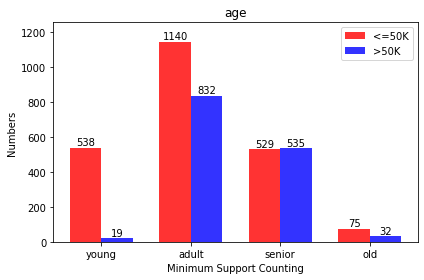

In [32]:
plot_bar_chart(filtered_df, 'age')

In [33]:
# for att in list(filtered_df)[:-1]:
#     plot_bar_chart(filtered_df, att)

11 atts + income (labels) \
Binary: country, capital loss, cappital gain, sex (4) \
Ordered: age, education, hr_per_week (3) \
Nominal: type_employer, martial, race, martial (4)

In [34]:
# test gini function 
def gini_index(df):
    # calculate calculate the gini_index for each node
    count_0, count_1 = counting_label(df)
#     print("Count_0: ", count_0)
#     print("Count_1: ", count_1)
#     print("Total: ", count_0 + count_1)
    if count_0 == 0 or count_1 == 0:
        return 0
    total = count_0 + count_1
    gini_index = 1 - (count_0 / total)**2 - (count_1 / total)**2
    return gini_index

In [35]:
def split(attribute_values, attribute_type):
    # attribute generate all posible left, right of a node
    # 0 binary, 1: orinal, 2: nominal
    # results = list of all potential outcomes: (left, right) tuple
    results = []
    if attribute_type == 0:
        g_left = [attribute_values[0]]
        g_right = [attribute_values[1]]
        results.append((g_left, g_right))
    elif attribute_type == 1:
        # co the sort cai list xong roi increse dan dan
        # get all values of this attributes in order
        attribute_values = sorted(attribute_values, )
        for i in range(1, len(attribute_values)):
            g_left = attribute_values[:i]
            g_right = attribute_values[i:]
            results.append((g_left, g_right))
    else:
        # gen combinations for left and set all - set(left)
        for L in range(1, len(attribute_values)):
            for com in combinations(attribute_values, L):
                g_left = list(com)
                g_right = list(set(attribute_values) - set(com))
                results.append((g_left, g_right))        
    return results

In [36]:
tmp_df = filtered_df.loc[filtered_df['type_employer'].isin(['Private', 'Not-working'])]
tmp_df[:10]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,young,Private,HS-grad,Married,ManualWork,White,Male,no,no,full-time,United-States,0
1,adult,Private,AfterHS,Never-married,Prof-specialty,White,Female,no,no,full-time,United-States,0
2,senior,Private,AfterHS,Not-married,Other,White,Female,no,no,full-time,United-States,0
3,adult,Private,BeforeHS,Never-married,ManualWork,White,Male,no,no,part-time,United-States,0
4,young,Private,Grd,Never-married,Sales,White,Female,no,no,part-time,United-States,0
6,young,Private,BeforeHS,Never-married,Other,White,Male,no,yes,part-time,United-States,0
7,senior,Private,AfterHS,Never-married,Sales,White,Male,no,no,over-time,United-States,1
9,adult,Private,Grd,Married,Prof-specialty,White,Male,no,no,over-time,United-States,0
11,young,Private,HS-grad,Never-married,Prof-specialty,White,Male,no,no,part-time,United-States,0
14,young,Private,Bachelors,Never-married,Exec-managerial,White,Female,no,no,full-time,United-States,0


In [37]:
tmp_df.type_employer.value_counts()

Private        2635
Not-working       1
Name: type_employer, dtype: int64

In [38]:
tmp_df_2 = filtered_df.loc[filtered_df['type_employer'].isin(['Self-employed', 'gov'])]
tmp_df_2[:10]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
5,senior,Self-employed,Grd,Married,Sales,White,Male,yes,no,over-time,United-States,1
8,senior,gov,Bachelors,Married,Prof-specialty,White,Female,yes,no,part-time,United-States,1
10,adult,Self-employed,HS-grad,Married,Exec-managerial,White,Male,no,no,over-time,United-States,1
12,adult,gov,Grd,Married,Prof-specialty,White,Female,no,no,part-time,United-States,1
13,senior,gov,AfterHS,Married,Exec-managerial,White,Male,yes,no,part-time,United-States,1
15,adult,gov,Bachelors,Married,Other,Asian-Pac-Islander,Male,no,no,full-time,other,1
20,adult,gov,AfterHS,Married,ManualWork,White,Male,no,no,full-time,United-States,1
26,old,Self-employed,Bachelors,Married,Sales,White,Male,no,no,part-time,United-States,1
29,adult,Self-employed,HS-grad,Married,ManualWork,White,Male,no,no,over-time,United-States,0
32,senior,Self-employed,HS-grad,Not-married,ManualWork,White,Male,no,no,over-time,United-States,1


In [39]:
tmp_df_2.type_employer.value_counts()

gov              563
Self-employed    501
Name: type_employer, dtype: int64

In [40]:
parent_gini_tmp = gini_index(filtered_df) 

In [41]:
parent_gini_tmp

0.472735719503287

In [42]:
gini_left_tmp = gini_index(tmp_df)
gini_left_tmp

0.4532534810410771

In [43]:
gini_right_tmp = gini_index(tmp_df_2)
gini_right_tmp

0.49851426027474705

In [44]:
weighted_gini = (len(tmp_df.index) * gini_left_tmp + len(tmp_df_2.index) * gini_right_tmp) / len(filtered_df.index)
weighted_gini

0.46626901323151626

In [45]:
col_names = list(filtered_df)
print(col_names)

['age', 'type_employer', 'education', 'marital', 'occupation', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']


In [46]:
def mapper(df, mapper_dict):
    df = df.replace(mapper_dict)
    return df

In [47]:
mapper_age = {'young': "0", 'adult': "1", 'senior': "2", 'old': "3"}
filtered_df = mapper(filtered_df, mapper_age)
filtered_df.age.unique().tolist()

['0', '1', '2', '3']

In [48]:
mapper_edu = {'BeforeHS': "0", 'HS-grad': "1" , 'AfterHS': "2", 'Bachelors': "3", 'Grd': "4"}
filtered_df = mapper(filtered_df, mapper_edu)
filtered_df.education.unique().tolist()

['1', '2', '0', '4', '3']

In [49]:
mapper_hr = {'part-time': "0", 'full-time': "1", 'over-time': "2"}
filtered_df = mapper(filtered_df, mapper_hr)
filtered_df.hr_per_week.unique().tolist()

['1', '0', '2']

In [50]:
filtered_df[:20]

,age,type_employer,education,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,0,Private,1,Married,ManualWork,White,Male,no,no,1,United-States,0
1,1,Private,2,Never-married,Prof-specialty,White,Female,no,no,1,United-States,0
2,2,Private,2,Not-married,Other,White,Female,no,no,1,United-States,0
3,1,Private,0,Never-married,ManualWork,White,Male,no,no,0,United-States,0
4,0,Private,4,Never-married,Sales,White,Female,no,no,0,United-States,0
5,2,Self-employed,4,Married,Sales,White,Male,yes,no,2,United-States,1
6,0,Private,0,Never-married,Other,White,Male,no,yes,0,United-States,0
7,2,Private,2,Never-married,Sales,White,Male,no,no,2,United-States,1
8,2,gov,3,Married,Prof-specialty,White,Female,yes,no,0,United-States,1
9,1,Private,4,Married,Prof-specialty,White,Male,no,no,2,United-States,0


In [51]:
def find_best_split(df, attributes, attribute_type_list):
    parent_gini = gini_index(df)
    print(parent_gini)
    best_gini_list = []
    best_split_attrs = []
    for attribute, attribute_type in zip(attributes, attribute_type_list):
        print(f'attribute: {attribute}, type: {attribute_type}')
        # for each attribute find all potential outcomes
        N = len(df[attribute].index)
        attribute_values = df[attribute].unique().tolist()
        p_splits = split(attribute_values, attribute_type)
#         continue
        max_gain = -100
        best_split_att = None
        gini_list = []
        for p_split in p_splits:
            left, right = p_split
#             print(f'left: {left}, right: {right}')
            # calculate gini for this split
            # get sub df for left group 
            df_left = df.loc[df[attribute].isin(left)]
            gini_left = gini_index(df_left)
#             print("Gini for left: ",gini_left)
            # get sub df for right group
            df_right = df.loc[df[attribute].isin(right)]
            gini_right = gini_index(df_right)
#             print("Gini for right: ", gini_right)
            # calculate weighted gini for each split and gain
            weighted_gini = (len(df_left.index) * gini_left + len(df_right.index) * gini_right) / N
#             print("Weighted gini: ", weighted_gini)
            gain_gini = parent_gini - weighted_gini
            gini_list.append(gain_gini)
#             print("Check max, curr: ", gain_gini, max_gain)
            if gain_gini > max_gain:
                max_gain = gain_gini
                best_split_att = (left, right)
        best_gini_list.append(max_gain)
        best_split_attrs.append(best_split_att)
    print(best_gini_list)
    print(attributes)
    best_gini = max(best_gini_list)
    best_attribute = attributes[best_gini_list.index(best_gini)]
    best_split = best_split_attrs[best_gini_list.index(best_gini)]
    return best_split, best_gini, best_attribute

11 atts + income (labels) \
Binary: country, capital loss, cappital gain, sex (4) \
Ordered: age, education, hr_per_week (3) \
Nominal: type_employer, martial, race, occupation(4)

In [52]:
col_names = ['age', 'type_employer', 'education', 'marital', 'occupation', 'race', 
             'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country']
attribute_type_list = [1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0]
best_split, best_gini, best_attribute = find_best_split(filtered_df, col_names, attribute_type_list)

0.472735719503287
attribute: age, type: 1
attribute: type_employer, type: 2
attribute: education, type: 1
attribute: marital, type: 2
attribute: occupation, type: 2
attribute: race, type: 2
attribute: sex, type: 0
attribute: capital_gain, type: 0
attribute: capital_loss, type: 0
attribute: hr_per_week, type: 1
attribute: country, type: 0
[0.043203601821720894, 0.006466706271770761, 0.04221294894867211, 0.12330413747364533, 0.04878576651311983, 0.006028664001267614, 0.030961623796457727, 0.03815873118199048, 0.007683284396466872, 0.034748951135643524, 0.002007326274893695]
['age', 'type_employer', 'education', 'marital', 'occupation', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country']


In [53]:
best_split, best_gini, best_attribute

((['Married'], ['Never-married', 'Not-married']),
 0.12330413747364533,
 'marital')

For data visualization

In [54]:
# class tree node for create a new node in tree
class Node(object):
    def __init__(self):
        
        self.left = None # left child
        self.right = None # right child
        
        self.parent_id = None # id of parents, none for root node
        self.id = 0
        self.splitting_att = None # splitting attribute
        self.g_left = [] # group of elements for left child 
        self.g_right = [] # group of elements for right child
        self.label = -1 # label of the node 0: neg, 1: pos, -1: non-determine
        
        self.n_pos = 0 # number of positive labels for left child
        self.n_neg = 0 # number of negative labels for right child
        

In [71]:
class BinaryDT(object):
    
    def __init__(self, min_sup, numNode = 0):
        self.root = None
        self.min_sup = min_sup
        self.numNode = 0
    
    def order2category(self, split_list, attribute):
        
        if attribute == 'age':
            
            mapper = {"0": 'young', "1": 'adult' , "2": 'senior', "3" : 'old'}
            new_split_list = [mapper[item] for item in split_list]
            
        elif attribute == 'education':
            
            mapper = {"0":'BeforeHS' , "1" : 'HS-grad', "2" : 'AfterHS', "3" : 'Bachelors', "4" : 'Grd'}
            new_split_list = [mapper[item] for item in split_list]
            
        elif attribute == 'hr_per_week':
            
            mapper = {"0": 'part-time', "1": 'full-time', "2": 'over-time'}
            new_split_list = [mapper[item] for item in split_list]
            
        else:
            new_split_list = split_list
        return new_split_list
    
    
    def gini_index(self, df):
        # get counting number for df
        count_0, count_1 = self.counting_label(df)
        # calculate calculate the gini_index for each node
        if count_0 == 0 or count_1 == 0:
            return 0
        total = count_0 + count_1
        gini_index = 1 - (count_0 / total)**2 - (count_1 / total)**2
        return gini_index
    
    
    def counting_label(self, df):
        counting = df['income'].value_counts().to_dict()
        if '0' not in counting.keys():
            counting['0'] = 0
        elif '1' not in counting.keys():
            counting['1'] = 0
        return counting['0'], counting['1']
    
    
    def split(self, attribute_values, attribute_type):
        # attribute generate all posible left, right of a node
        # 0 binary, 1: orinal, 2: nominal
        # results = list of all potential outcomes: (left, right) tuple
        results = []
        if attribute_type == 0:
#             print(attribute_values)
            if len(attribute_values) == 2:
                g_left = [attribute_values[0]]
                g_right = [attribute_values[1]]
                results.append((g_left, g_right))
        elif attribute_type == 1:
            # co the sort cai list xong roi increse dan dan
            # get all values of this attributes in order
            attribute_values = sorted(attribute_values)
            for i in range(1, len(attribute_values)):
                g_left = attribute_values[:i]
                g_right = attribute_values[i:]
                results.append((g_left, g_right))
        else:
            # gen combinations for left and set all - set(left)
            for L in range(1, len(attribute_values)):
                for com in combinations(attribute_values, L):
                    g_left = list(com)
                    g_right = list(set(attribute_values) - set(com))
                    results.append((g_left, g_right))        
        return results
    
    
    def stop(self, df, atts):
        # case 1: no more attribute
        count_0, count_1 = self.counting_label(df)
#         print(count_0, count_1)
        if len(atts) == 0:
            print("Doesn't have any attributes left.")
            return True
        # case 2: node is pure
        elif count_0 == 0 or count_1 == 0:
            print("Pure node.")
            return True
        # case 3: support below min sup
        elif count_0 < self.min_sup or count_1 < self.min_sup:
#             print(count_0, count_1)
            print(f"Pos: {count_1}, Neg: {count_0} | Support below min sup: {self.min_sup}.")
            return True
        return False

    def find_best_split(self, df, attributes, attribute_type_list):
        # calculate gini of parent node
        parent_gini = self.gini_index(df)
#         print(parent_gini)
        best_gini_list = []
        best_split_attrs = []
        for attribute, attribute_type in zip(attributes, attribute_type_list):
#             print(f'attribute: {attribute}, type: {attribute_type}')
            # for each attribute find all potential outcomes
            N = len(df[attribute].index)
            attribute_values = df[attribute].unique().tolist()
#             print(attribute)
            p_splits = self.split(attribute_values, attribute_type)
            # init value for choosing best split
            max_gain = -100
            best_split_att = None
            gini_list = []
            
            for p_split in p_splits:
                left, right = p_split
                # calculate gini for this split
                # get sub df for left group 
                df_left = df.loc[df[attribute].isin(left)]
                gini_left = self.gini_index(df_left)

                # get sub df for right group
                df_right = df.loc[df[attribute].isin(right)]
                gini_right = self.gini_index(df_right)

                # calculate weighted gini for each split and gain
                weighted_gini = (len(df_left.index) * gini_left + len(df_right.index) * gini_right) / N

                gain_gini = parent_gini - weighted_gini
                gini_list.append(gain_gini)
                
                if gain_gini > max_gain:
                    max_gain = gain_gini
                    best_split_att = (left, right)
            best_gini_list.append(max_gain)
            best_split_attrs.append(best_split_att)
            
        best_gini = max(best_gini_list)
        best_attribute = attributes[best_gini_list.index(best_gini)]
        best_split = best_split_attrs[best_gini_list.index(best_gini)]
        return best_split, best_gini, best_attribute
        
        
    def classify(self, df):
        # classify by major voting
        count_0, count_1 = self.counting_label(df)
        return '1' if count_1 > count_0 else '0'
    
    
    def save_model(self, root):
        # travesal the tree using bfs 
        with open('model.txt', 'w') as f:
            queue = [root]
            while queue:
                len_level = len(queue)
                for i in range(len_level):
                    line = ''
                    node = queue.pop(0)
                    if node:
                        if node.label == -1:
                            parent_id = 'NULL' if not node.parent_id else str(node.parent_id)
                            line += f'n{node.id}:{node.parent_id}:{node.splitting_att}'
                            if node.left:
                                left_attr_values = ','.join(node.g_left)
                                line += f':{left_attr_values}:n{node.left.id}'
                            if node.right:
                                right_attr_values = ','.join(node.g_right)
                                line += f':{right_attr_values}:n{node.right.id}\n'
                        else:
                            class_label = '>50K' if node.label == 1 else '<=50K'
                            line += f'{node.id}:{node.parent_id}:leaf:{class_label}\n'
                        f.write(line)
                        queue.append(node.left)
                        queue.append(node.right)
    
    
    def tree_grow(self, df, atts, type_atts, parent_id):
        print(self.numNode, parent_id)
        if self.stop(df, atts) == True:
            leaf = Node()
            leaf.id = self.numNode
            leaf.parent_id = parent_id
            leaf.label = self.classify(df)
            print("Creating a leaf with: ", leaf.label)
            return leaf
        else:
            # calculate parent attribute
            b_split, b_gini, split_attribute = self.find_best_split(df, atts, type_atts)
            g_left, g_right = b_split
            
#             print('marital' in list(df))
#             df = df.drop([split_attribute], axis=1)
            df_left = df.loc[df[split_attribute].isin(g_left)].drop(split_attribute, 1) # data for left child
            df_right = df.loc[df[split_attribute].isin(g_right)].drop(split_attribute, 1) # data for right child
            
            g_left = self.order2category(g_left, split_attribute)
            g_right = self.order2category(g_right, split_attribute)
            print(f"After splitting using {split_attribute}: left: {g_left}, right: {g_right}, gini: {b_gini}")
            
            remain_atts, remain_types = [], []
            for k, v in zip(atts, type_atts):
                if k != split_attribute:
                    remain_atts.append(k)
                    remain_types.append(v)
                    
            
            count_neg, count_pos = self.counting_label(df)
            
            # create a new node
            root = Node()
            root.parent_id = parent_id
            root.id = self.numNode
            root.splitting_att = split_attribute
            root.g_left = g_left
            root.g_right = g_right
            root.n_pos = count_pos
            root.n_neg = count_neg
            
            self.numNode += 1
            # recursive to the left
            print("GO LEFT: ", df_left.shape, self.numNode)
            root.left = self.tree_grow(df_left, 
                                       remain_atts, 
                                       remain_types,  
                                       root.id)
            self.numNode += 1
            # recursive to the right
            print("GO RIGHT: ", df_right.shape, self.numNode)
            root.right = self.tree_grow(df_right, 
                                        remain_atts, 
                                        remain_types,  
                                        root.id)
        return root

In [72]:
attribute_type_list = [1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0]

In [73]:
tree = BinaryDT(min_sup=10)

In [74]:
root =  tree.tree_grow(filtered_df, list(filtered_df), attribute_type_list, None)

0 None
After splitting using marital: left: ['Married'], right: ['Never-married', 'Not-married'], gini: 0.12330413747364533
GO LEFT:  (2024, 11) 1
1 0
After splitting using education: left: ['BeforeHS', 'HS-grad'], right: ['AfterHS', 'Bachelors', 'Grd'], gini: 0.06281383097309368
GO LEFT:  (814, 10) 2
2 1
After splitting using capital_gain: left: ['no'], right: ['yes'], gini: 0.022117495649950136
GO LEFT:  (732, 9) 3
3 2
After splitting using hr_per_week: left: ['part-time'], right: ['full-time', 'over-time'], gini: 0.01539704708539913
GO LEFT:  (101, 8) 4
4 3
After splitting using type_employer: left: ['gov'], right: ['Private', 'Self-employed', 'Not-working'], gini: 0.012377475371299462
GO LEFT:  (11, 7) 5
5 4
Pos: 4, Neg: 7 | Support below min sup: 10.
Creating a leaf with:  0
GO RIGHT:  (90, 7) 6
6 4
After splitting using occupation: left: ['ManualWork', 'Prof-specialty'], right: ['Exec-managerial', 'Other', 'Sales'], gini: 0.010508821912330768
GO LEFT:  (38, 6) 7
7 6
Pos: 1, Neg: 

After splitting using capital_loss: left: ['no'], right: ['yes'], gini: 0.005784551720745379
GO LEFT:  (569, 7) 82
82 81
After splitting using hr_per_week: left: ['part-time'], right: ['full-time', 'over-time'], gini: 0.006837312404405105
GO LEFT:  (59, 6) 83
83 82
After splitting using age: left: ['young', 'adult'], right: ['senior', 'old'], gini: 0.055157233841519826
GO LEFT:  (33, 5) 84
84 83
Pos: 25, Neg: 8 | Support below min sup: 10.
Creating a leaf with:  1
GO RIGHT:  (26, 5) 85
85 83
After splitting using type_employer: left: ['Private'], right: ['Self-employed', 'gov'], gini: 0.03315402546171792
GO LEFT:  (11, 4) 86
86 85
Pos: 3, Neg: 8 | Support below min sup: 10.
Creating a leaf with:  0
GO RIGHT:  (15, 4) 87
87 85
Pos: 8, Neg: 7 | Support below min sup: 10.
Creating a leaf with:  1
GO RIGHT:  (510, 6) 88
88 82
After splitting using age: left: ['young', 'adult'], right: ['senior', 'old'], gini: 0.0035857729567913
GO LEFT:  (321, 5) 89
89 88
After splitting using sex: left: [

After splitting using sex: left: ['Male'], right: ['Female'], gini: 0.015118230591236181
GO LEFT:  (77, 5) 157
157 156
After splitting using race: left: ['Asian-Pac-Islander'], right: ['Black', 'White'], gini: 0.0075650756170235756
GO LEFT:  (2, 4) 158
158 157
Pure node.
Creating a leaf with:  0
GO RIGHT:  (75, 4) 159
159 157
After splitting using education: left: ['BeforeHS'], right: ['HS-grad', 'AfterHS', 'Bachelors', 'Grd'], gini: 0.004040840840840942
GO LEFT:  (1, 3) 160
160 159
Pure node.
Creating a leaf with:  0
GO RIGHT:  (74, 3) 161
161 159
After splitting using type_employer: left: ['Self-employed'], right: ['Private', 'gov'], gini: 0.002843017089466826
GO LEFT:  (15, 2) 162
162 161
Pos: 7, Neg: 8 | Support below min sup: 10.
Creating a leaf with:  0
GO RIGHT:  (59, 2) 163
163 161
After splitting using country: left: ['United-States'], right: ['other'], gini: 0.0011339754154129356
GO LEFT:  (57, 1) 164
164 163
Doesn't have any attributes left.
Creating a leaf with:  0
GO RIGHT

In [75]:
tree.save_model(root)

In [80]:
def save_model(root):
    # travesal the tree using bfs 
    with open('model.txt', 'w') as f:
        queue = []
        queue.append(root)
        ans = []
        while queue:
            len_level = len(queue)
            ans_lv = []
            for i in range(len_level):           
                node = queue.pop(0)
                ans_lv.append(node.id)
                if node:
                    line = ''
                    if node.label == -1:
                        parent_id = 'NULL' if node.parent_id is None else str(node.parent_id)
                        if parent_id == 'NULL':
                            line += f'n{node.id}:{parent_id}:{node.splitting_att}'
                        else:
                            line += f'n{node.id}:n{node.parent_id}:{node.splitting_att}'
                        if node.left:
                            left_attr_values = ','.join(node.g_left)
                            line += f':{left_attr_values}:n{node.left.id}'
                            queue.append(node.left)
                        if node.right:
                            right_attr_values = ','.join(node.g_right)
                            line += f':{right_attr_values}:n{node.right.id}\n'
                            queue.append(node.right)
                    else:
                        class_label = '>50K' if node.label == '1' else '<=50K'
                        line = f'n{node.id}:n{node.parent_id}:leaf:{class_label}\n'
                    print(line)
                    f.write(line)
            print(ans_lv)

In [81]:
save_model(root)

n0:NULL:marital:Married:n1:Never-married,Not-married:n118

[0]
n1:n0:education:BeforeHS,HS-grad:n2:AfterHS,Bachelors,Grd:n47

n118:n0:capital_gain:no:n119:yes:n170

[1, 118]
n2:n1:capital_gain:no:n3:yes:n34

n47:n1:occupation:Other,ManualWork:n48:Prof-specialty,Exec-managerial,Sales:n79

n119:n118:hr_per_week:part-time,full-time:n120:over-time:n143

n170:n118:education:BeforeHS,HS-grad,AfterHS:n171:Bachelors,Grd:n182

[2, 47, 119, 170]
n3:n2:hr_per_week:part-time:n4:full-time,over-time:n9

n34:n2:occupation:ManualWork,Other:n35:Exec-managerial,Prof-specialty,Sales:n46

n48:n47:capital_gain:no:n49:yes:n78

n79:n47:capital_gain:yes:n80:no:n81

n120:n119:education:BeforeHS,HS-grad,AfterHS,Bachelors:n121:Grd:n140

n143:n119:capital_loss:no:n144:yes:n169

n171:n170:race:Asian-Pac-Islander:n172:Amer-Indian-Eskimo,Black,Other,White:n173

n182:n170:leaf:>50K

[3, 34, 48, 79, 120, 143, 171, 182]
n4:n3:type_employer:gov:n5:Private,Self-employed,Not-working:n6

n9:n3:country:United-States:n10:oth